In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns 
import matplotlib.pyplot as plt  

In [7]:
dataset = pd.read_csv(r"Datasets\data.csv",sep=",")
dataset.head()

,Unnamed: 0,Districts,Marginal,Small farms,Semi-Medium farms,Medium farms,Large,crop_intensity,Literacy Rate,capacity_warehouse,occupancy_warehouse,vacancy_warehouse,NonWork-%,State Highways,Major District Roads,Rural Roads,crop_diversity
0,0,ADILABAD,38320.0,44643.0,31113.0,7611.0,535.0,1.05,63.440,76665.0,19591.80,57073.20,50.756729,80,123,301,26.0
1,1,BHADRADRI,75738.0,32202.0,19815.0,4750.0,573.0,1.15,66.445,66050.0,53851.99,12198.01,51.638468,104,410,420,15.0
2,2,HYDERABAD,NaN,NaN,NaN,NaN,NaN,NaN,83.170,4000.0,0.00,4000.00,64.159745,37,5,77,NaN
3,3,JAGTIAL,122152.0,33610.0,14069.0,4141.0,305.0,1.32,60.490,60040.0,27908.15,32131.85,45.562538,0,222,461,15.0
4,4,JANGAON,90994.0,35348.0,15975.0,5459.0,406.0,1.28,61.450,31000.0,23879.04,7120.96,49.239904,28,564,49,13.0


In [128]:
dataset = dataset.fillna(dataset.mean())

In [129]:
districts = list(dataset["Districts"])
dataset = dataset.drop(["Districts","Unnamed: 0"],axis=1)

In [130]:
labels = [[1,0,0],[1,0,0],[0,0,1],[0,1,0],[0,1,0],[1,0,0],[0,0,1],[0,1,0],[1,0,0],[0,1,0],[0,0,1],[0,1,0],[1,0,0],[0,0,1],[0,0,1],[0,0,1],[1,0,0],[1,0,0],[1,0,0],[1,0,0],[0,0,1],[0,1,0],[0,1,0],[1,0,0],[0,0,1],[1,0,0],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[0,0,1]]

In [131]:
labelsarr = np.array(labels)
labell = []
for i in labelsarr:
       labell.append(np.where(i==1)[0][0])

In [132]:
dataset["FoodSecurity_Base"] = labell

In [133]:
x = dataset.iloc[:, 0:-1]
y = dataset.iloc[:,-1:]

In [134]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [135]:
scaler = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [136]:
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    Knn_clf = KNeighborsClassifier(n_neighbors = k) 
    Knn_clf.fit(X_train, y_train) 
  
    training_score = Knn_clf.score(X_train, y_train) 
    test_score = Knn_clf.score(X_test, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 
print("Knn Classfier Scores ::",scores)    

Knn Classfier Scores :: {2: [0.5238095238095238, 0.4], 3: [0.47619047619047616, 0.3], 4: [0.5714285714285714, 0.3], 5: [0.5714285714285714, 0.4], 6: [0.5714285714285714, 0.3], 7: [0.42857142857142855, 0.3], 8: [0.42857142857142855, 0.3], 9: [0.3333333333333333, 0.4], 10: [0.38095238095238093, 0.4], 11: [0.3333333333333333, 0.4], 12: [0.3333333333333333, 0.5], 13: [0.2857142857142857, 0.3], 14: [0.2857142857142857, 0.4], 15: [0.3333333333333333, 0.4], 16: [0.2857142857142857, 0.5], 17: [0.3333333333333333, 0.4], 18: [0.14285714285714285, 0.3], 19: [0.2857142857142857, 0.2], 20: [0.38095238095238093, 0.4]}


C:\Users\MSI\Anaconda3\envs\python_env\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\MSI\Anaconda3\envs\python_env\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\MSI\Anaconda3\envs\python_env\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\MSI\Anaconda3\envs\python_env\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\MSI\Anaconda3\envs\python_e

In [137]:
clf = RandomForestClassifier(n_estimators = 5)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)) 

ACCURACY OF THE MODEL:  0.4


C:\Users\MSI\Anaconda3\envs\python_env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [153]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
yhat

C:\Users\MSI\Anaconda3\envs\python_env\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [158]:
print(Knn_clf.predict(X_test),"\n",list(y_test.values))

[1 1 0 0 0 1 0 0 1 0] 
 [array([2], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64)]


[Text(0,0.5,'Training Score'), Text(0.5,0,'values of k')]

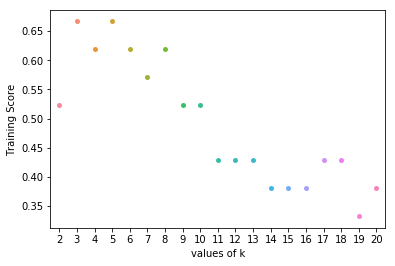

In [119]:
ax = sns.stripplot(K, training); 
ax.set(xlabel ='values of k', ylabel ='Training Score') 

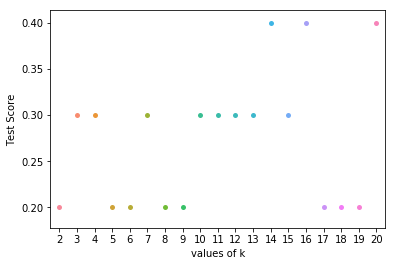

In [122]:
ax = sns.stripplot(K, test); 
ax.set(xlabel ='values of k', ylabel ='Test Score') 
plt.show() 

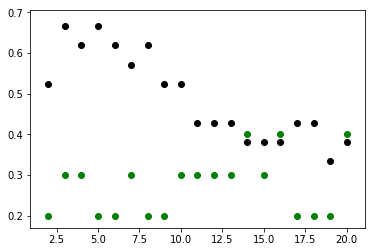

In [123]:
plt.scatter(K, training, color ='k') 
plt.scatter(K, test, color ='g') 
plt.show() 

In [124]:
X_test[0]

array([-2.00291039, -1.06412521,  0.66546753,  0.61758353,  0.26750642,
       -0.74648298, -0.85936704, -0.80536002, -0.78253544, -0.20512658,
        0.07761131, -0.01008096,  1.47431649,  0.06761841,  4.7633699 ])